notebook for presentation
for TangibleAI internship project

The purpose of my project was to learn about time series forecasting, so I chose to work with a stock prediction dataset.

### Dataset

In [1]:
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loads stocks based on tickers, using only 1 in showcase for performance purposes but can be run with as many as required
def load_stocks(tickers=['AAPL']):
    '''
    loads stocks

    >>> df = load_stocks()
    >>> df
                                AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  AAPL_Volume  ...  AMZN_Close  AMZN_Volume AMZN_Dividends  AMZN_Stock Splits                AMZN_today
    Date                                                                                    ...                                                                                     
    2003-07-22 00:00:00-04:00    0.316756    0.318122    0.311139    0.315693    198424800  ...    1.743500    317936000            0.0                0.0 2003-07-22 00:00:00-04:00
    ...                               ...         ...         ...         ...          ...  ...         ...          ...            ...                ...                       ...
    2023-07-21 00:00:00-04:00  194.100006  194.970001  191.320007  191.940002     58364002  ...  130.000000     96482177            0.0                0.0 2023-07-21 00:00:00-04:00

    [5035 rows x 16 columns]
    >>> df.shape
    (5035, 16)
    '''
    df = pd.DataFrame()
    for ticker in tickers:
        t = yf.Ticker(ticker)
        # 240 is 20 years
        t_hist: pd.DataFrame = t.history(period='240mo')
        t_hist['today'] = t_hist.index.to_list()

         # add ticker to every column
        rename = {}
        for c in t_hist.columns:
            if c != 'today':
                rename[c] = ticker + '_' + c
        t_hist = t_hist.rename(columns=rename)

        # add cols to data
        for c in t_hist.columns:
            df[c] = t_hist[c]

    df['ds'] = df.index

    return df

In [3]:
# default is one ticker, AAPL
df = load_stocks()
df

AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  \
Date                                                                        
2003-08-25 00:00:00-04:00    0.314964    0.316935    0.310569    0.316177   
2003-08-26 00:00:00-04:00    0.314510    0.319360    0.308447    0.319057   
2003-08-27 00:00:00-04:00    0.316935    0.325574    0.313146    0.325574   
2003-08-28 00:00:00-04:00    0.323301    0.336791    0.323301    0.336336   
2003-08-29 00:00:00-04:00    0.336488    0.346339    0.334214    0.342702   
...                               ...         ...         ...         ...   
2023-08-18 00:00:00-04:00  172.300003  175.100006  171.960007  174.490005   
2023-08-21 00:00:00-04:00  175.070007  176.130005  173.740005  175.839996   
2023-08-22 00:00:00-04:00  177.059998  177.679993  176.250000  177.229996   
2023-08-23 00:00:00-04:00  178.520004  181.550003  178.330002  181.119995   
2023-08-24 00:00:00-04:00  180.673996  181.104004  176.020004  176.380005   

                           AAPL_Volume  AAPL_Dividends  AAPL_Stock Splits  \
Date                                                                        
2003-08-25 00:00:00-04:00    137782400             0.0                0.0   
2003-08-26 00:00:00-04:00    164959200             0.0                0.0   
2003-08-27 00:00:00-04:00    225702400             0.0                0.0   
2003-08-28 00:00:00-04:00    319625600             0.0                0.0   
2003-08-29 00:00:00-04:00    263155200             0.0                0.0   
...                                ...             ...                ...   
2023-08-18 00:00:00-04:00     61114200             0.0                0.0   
2023-08-21 00:00:00-04:00     46311900             0.0                0.0   
2023-08-22 00:00:00-04:00     42084200             0.0                0.0   
2023-08-23 00:00:00-04:00     52722800             0.0                0.0   
2023-08-24 00:00:00-04:00     53184586             0.0                0.0   

                                              today                        ds  
Date                                                                           
2003-08-25 00:00:00-04:00 2003-08-25 00:00:00-04:00 2003-08-25 00:00:00-04:00  
2003-08-26 00:00:00-04:00 2003-08-26 00:00:00-04:00 2003-08-26 00:00:00-04:00  
2003-08-27 00:00:00-04:00 2003-08-27 00:00:00-04:00 2003-08-27 00:00:00-04:00  
2003-08-28 00:00:00-04:00 2003-08-28 00:00:00-04:00 2003-08-28 00:00:00-04:00  
2003-08-29 00:00:00-04:00 2003-08-29 00:00:00-04:00 2003-08-29 00:00:00-04:00  
...                                             ...                       ...  
2023-08-18 00:00:00-04:00 2023-08-18 00:00:00-04:00 2023-08-18 00:00:00-04:00  
2023-08-21 00:00:00-04:00 2023-08-21 00:00:00-04:00 2023-08-21 00:00:00-04:00  
2023-08-22 00:00:00-04:00 2023-08-22 00:00:00-04:00 2023-08-22 00:00:00-04:00  
2023-08-23 00:00:00-04:00 2023-08-23 00:00:00-04:00 2023-08-23 00:00:00-04:00  
2023-08-24 00:00:00-04:00 2023-08-24 00:00:00-04:00 2023-08-24 00:00:00-04:00  

[5035 rows x 9 columns]

In [4]:
# using only close for simplicity, date is in index 
df = df[["AAPL_Close"]]
df

AAPL_Close
Date                                 
2003-08-25 00:00:00-04:00    0.316177
2003-08-26 00:00:00-04:00    0.319057
2003-08-27 00:00:00-04:00    0.325574
2003-08-28 00:00:00-04:00    0.336336
2003-08-29 00:00:00-04:00    0.342702
...                               ...
2023-08-18 00:00:00-04:00  174.490005
2023-08-21 00:00:00-04:00  175.839996
2023-08-22 00:00:00-04:00  177.229996
2023-08-23 00:00:00-04:00  181.119995
2023-08-24 00:00:00-04:00  176.380005

[5035 rows x 1 columns]

## Date features

I wanted to find out if the month day or year can be used to predict stock prices:

- **month** is month of year 1-12
- **day** of month is day in the month 1-31 (months of different sizes cut off at different points)
- **year** is year 4 digits (e.g 2003, 1974, etc)

### Feature engineering

- **month** and day of month are one hot encoded because they a cyclical and should be treated as **categorical** variables
- **year** is left as a **continuous** numerical value (to deal with inflation)

In [5]:
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df = pd.get_dummies(df, columns=["month", "day_of_month"])
 
df["year"] = df.index.year

df

/tmp/ipykernel_11863/2082104746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.index.month
/tmp/ipykernel_11863/2082104746.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day_of_month"] = df.index.day


AAPL_Close  month_1  month_2  month_3  month_4  \
Date                                                                        
2003-08-25 00:00:00-04:00    0.316177    False    False    False    False   
2003-08-26 00:00:00-04:00    0.319057    False    False    False    False   
2003-08-27 00:00:00-04:00    0.325574    False    False    False    False   
2003-08-28 00:00:00-04:00    0.336336    False    False    False    False   
2003-08-29 00:00:00-04:00    0.342702    False    False    False    False   
...                               ...      ...      ...      ...      ...   
2023-08-18 00:00:00-04:00  174.490005    False    False    False    False   
2023-08-21 00:00:00-04:00  175.839996    False    False    False    False   
2023-08-22 00:00:00-04:00  177.229996    False    False    False    False   
2023-08-23 00:00:00-04:00  181.119995    False    False    False    False   
2023-08-24 00:00:00-04:00  176.380005    False    False    False    False   

                           month_5  month_6  month_7  month_8  month_9  ...  \
Date                                                                    ...   
2003-08-25 00:00:00-04:00    False    False    False     True    False  ...   
2003-08-26 00:00:00-04:00    False    False    False     True    False  ...   
2003-08-27 00:00:00-04:00    False    False    False     True    False  ...   
2003-08-28 00:00:00-04:00    False    False    False     True    False  ...   
2003-08-29 00:00:00-04:00    False    False    False     True    False  ...   
...                            ...      ...      ...      ...      ...  ...   
2023-08-18 00:00:00-04:00    False    False    False     True    False  ...   
2023-08-21 00:00:00-04:00    False    False    False     True    False  ...   
2023-08-22 00:00:00-04:00    False    False    False     True    False  ...   
2023-08-23 00:00:00-04:00    False    False    False     True    False  ...   
2023-08-24 00:00:00-04:00    False    False    False     True    False  ...   

                           day_of_month_23  day_of_month_24  day_of_month_25  \
Date                                                                           
2003-08-25 00:00:00-04:00            False            False             True   
2003-08-26 00:00:00-04:00            False            False            False   
2003-08-27 00:00:00-04:00            False            False            False   
2003-08-28 00:00:00-04:00            False            False            False   
2003-08-29 00:00:00-04:00            False            False            False   
...                                    ...              ...              ...   
2023-08-18 00:00:00-04:00            False            False            False   
2023-08-21 00:00:00-04:00            False            False            False   
2023-08-22 00:00:00-04:00            False            False            False   
2023-08-23 00:00:00-04:00             True            False            False   
2023-08-24 00:00:00-04:00            False             True            False   

                           day_of_month_26  day_of_month_27  day_of_month_28  \
Date                                                                           
2003-08-25 00:00:00-04:00            False            False            False   
2003-08-26 00:00:00-04:00             True            False            False   
2003-08-27 00:00:00-04:00            False             True            False   
2003-08-28 00:00:00-04:00            False            False             True   
2003-08-29 00:00:00-04:00            False            False            False   
...                                    ...              ...              ...   
2023-08-18 00:00:00-04:00            False            False            False   
2023-08-21 00:00:00-04:00            False            False            False   
2023-08-22 00:00:00-04:00            False            False            False   
2023-08-23 00:00:00-04:00            False            False            False

In [6]:
# lags all features in a dataframe to lag_num
# returns lagged dataframe
def lag_df(df: pd.DataFrame, lag_num):
    df2 = df.copy()
    for i in range(1, lag_num+1):
        for col in df.columns:
            df2[f"lag_{i}_"+col] = df[col].shift(i)
    return df2

In [7]:
# lagging all features once 
df = lag_df(df, 1).dropna()
df.columns

Index(['AAPL_Close', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_of_month_1', 'day_of_month_2', 'day_of_month_3',
       'day_of_month_4', 'day_of_month_5', 'day_of_month_6', 'day_of_month_7',
       'day_of_month_8', 'day_of_month_9', 'day_of_month_10',
       'day_of_month_11', 'day_of_month_12', 'day_of_month_13',
       'day_of_month_14', 'day_of_month_15', 'day_of_month_16',
       'day_of_month_17', 'day_of_month_18', 'day_of_month_19',
       'day_of_month_20', 'day_of_month_21', 'day_of_month_22',
       'day_of_month_23', 'day_of_month_24', 'day_of_month_25',
       'day_of_month_26', 'day_of_month_27', 'day_of_month_28',
       'day_of_month_29', 'day_of_month_30', 'day_of_month_31', 'year',
       'lag_1_AAPL_Close', 'lag_1_month_1', 'lag_1_month_2', 'lag_1_month_3',
       'lag_1_month_4', 'lag_1_month_5', 'lag_1_month_6', 'lag_1_month_7',
       'lag_1_month_8', 'l

In [8]:
# splitting function
# split is the percentage of the dataframe that should be used for training < 1
def split(data: pd.DataFrame, split: int, y_cols: list[str], exclude_cols: list) -> tuple[pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]:
    '''
    Split dataframe in X training set, X testing set, y training set, and y testing set

    >>> len(split(preprocess(), split=0.8, y_cols=['AAPL_Open'], exclude_cols=[]))
    4

    '''
    split_index = int(len(data) * split)

    y = data[y_cols]
    X = data.drop(y_cols + exclude_cols, axis=1)

    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]

    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]
        
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = split(data=df, split=0.8, y_cols=['AAPL_Close'], exclude_cols=[])
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4027
1007
4027
1007


### training and performance

In [10]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [11]:
preds = model.predict(X_train)
rmse_train = np.sqrt(np.mean((preds - y_train)**2))

preds = model.predict(X_test)
rmse_test = np.sqrt(np.mean((preds - y_test)**2))

print(rmse_train) 
print(rmse_test)

0.33974859479212877
2.5654509985766287


In [12]:
plotting_df = pd.DataFrame()
plotting_df["preds"] = preds[:, 0] 
plotting_df["AAPL_Close"] = y_test.reset_index()["AAPL_Close"]

plotting_df = plotting_df.set_index(y_test.index)

plotting_df

preds  AAPL_Close
Date                                             
2019-08-26 00:00:00-04:00   49.403750   50.207817
2019-08-27 00:00:00-04:00   50.194544   49.641285
2019-08-28 00:00:00-04:00   49.683401   49.974392
2019-08-29 00:00:00-04:00   49.998586   50.820553
2019-08-30 00:00:00-04:00   50.857892   50.754898
...                               ...         ...
2023-08-18 00:00:00-04:00  173.838152  174.490005
2023-08-21 00:00:00-04:00  174.392789  175.839996
2023-08-22 00:00:00-04:00  175.655200  177.229996
2023-08-23 00:00:00-04:00  177.031150  181.119995
2023-08-24 00:00:00-04:00  180.877661  176.380005

[1007 rows x 2 columns]

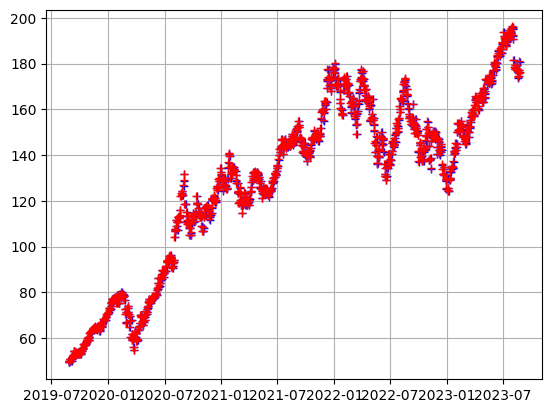

In [13]:
plt.plot(plotting_df.index, plotting_df.preds, "b+")
plt.plot(plotting_df.index, plotting_df.AAPL_Close, "r+")
plt.grid()
plt.show()

### experiments

In [14]:
# table is cleaned up csv from exported wandb run data
hyperparameter_table = pd.read_csv("processed_wandb.csv", index_col=0)
hyperparameter_table

Name  alpha       model_type  \
0  grateful-disco-21  1.000  sklearn Lasso()   
1     helpful-sun-20  1.000  sklearn Lasso()   
2       glad-hill-19  0.015  sklearn Lasso()   

                                        new_features  num_features  \
0  ["lag_2_AAPL_Close","lag_2_month_1","lag_2_mon...           494   
1                                                 []           179   
2                                                 []           179   

                                              _wandb  model_class  \
0  {"desc":null,"value":{"t":{"1":[5,53,55],"2":[...          NaN   
1  {"desc":null,"value":{"t":{"1":[5,53,55],"2":[...          NaN   
2  {"desc":null,"value":{"t":{"1":[5,53,55],"2":[...          NaN   

   coef.day_of_month_1  coef.day_of_month_2  coef.day_of_month_3  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  NaN                  NaN                  NaN  ...   

   coef.lag_10_day_of_month_9  coef.lag_3_day_of_month_29  \
0                         0.0                         0.0   
1                         NaN                         NaN   
2                         NaN                         NaN   

   coef.lag_4_day_of_month_20  coef.lag_6_day_of_month_18  coef.lag_2_month_1  \
0                         0.0                         0.0                 0.0   
1                         NaN                         NaN                 NaN   
2                         NaN                         NaN                 NaN   

   coef.lag_3_day_of_month_25  coef.lag_9_day_of_month_18  coef.lag_6_month_3  \
0                         0.0                         0.0                 0.0   
1                         NaN                         NaN                 NaN   
2                         NaN                         NaN                 NaN   

   coef.lag_2_day_of_month_26  coef.lag_3_day_of_month_21  
0                         0.0                         0.0  
1                         NaN                         NaN  
2                         NaN                         NaN  

[3 rows x 514 columns]

Summary of hyperparameter table (it does not include all runs as I switched the structure around as I was figuring out how I wanted to record the info):
- when adding lags > 1 week only some lags seemed to have non zero coefficients
- date features were not very helpfull overall (may become more helpfull with more lags?)
- lasso models tended to not help with overfitting at all with all alpha values tried (linear regression models not shown on table)

### Moving forward

stock prediction is a very hard problem, so if I were to continue this I would pivot to a different one.

one idea that came up along the way was web traffic prediction, which could be interesting